# Import Package and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection as cv
import seaborn as sns
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

In [2]:
dataset=pd.read_csv("train.csv")
hold_test=pd.read_csv("holdout_test.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Preprocess the data.

In [5]:
dataset.shape

(891, 12)

In [6]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Drop less useful variables

In [8]:
dataset.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
dataset = dataset.drop(['PassengerId'], axis = 1)
dataset = dataset.drop(['Name'], axis = 1)
dataset = dataset.drop(['Ticket'], axis = 1)
dataset = dataset.drop(['Cabin'], axis = 1)

In [10]:
#dataset.count()
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Deal with missing values, imputation 

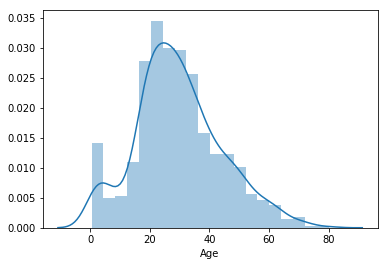

In [11]:
sns.distplot(dataset[dataset["Age"].notnull()]["Age"])

In [12]:
dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)

In [13]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [14]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
dataset['Embarked']=dataset['Embarked'].fillna('S')

In [16]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

correlation check

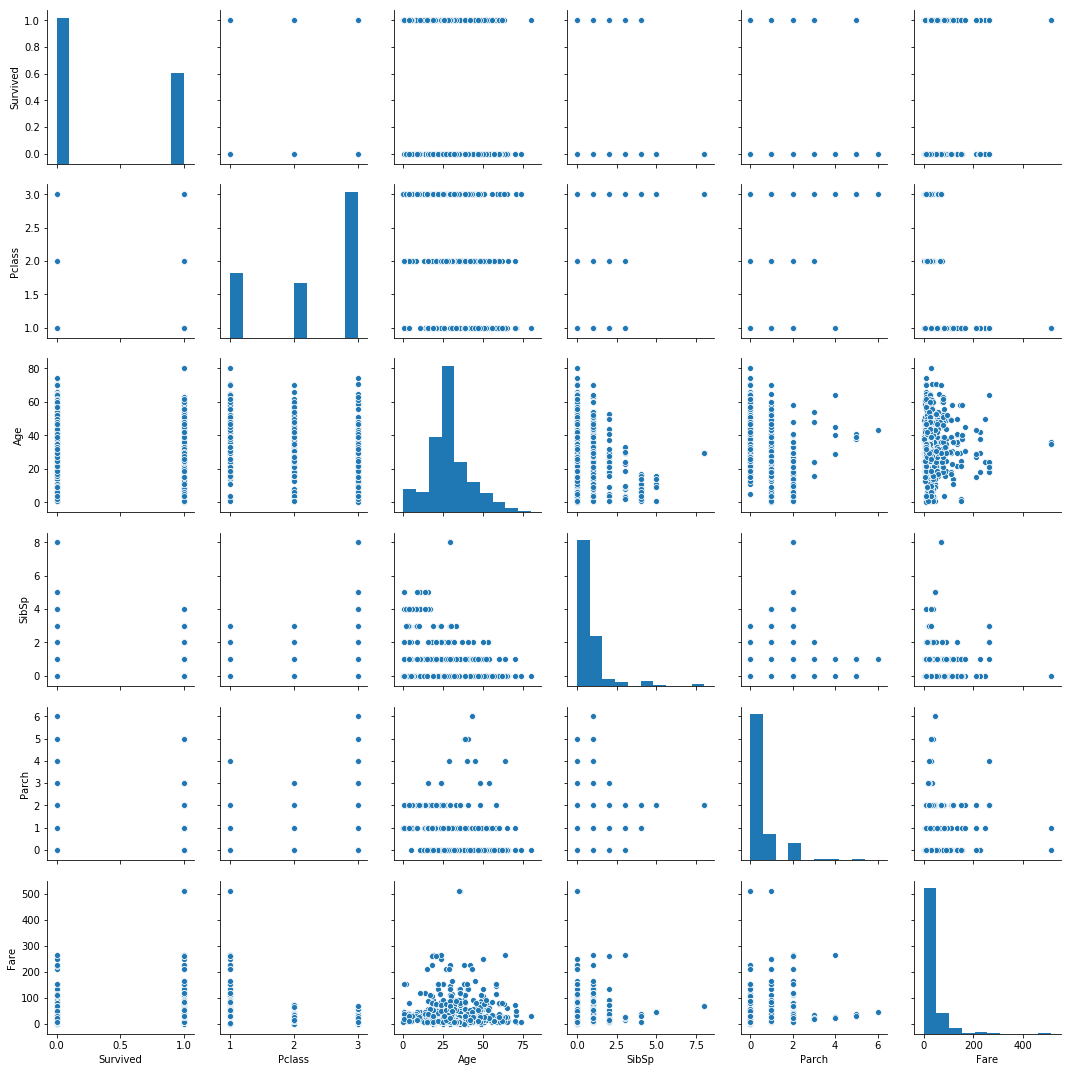

In [17]:
sns.pairplot(dataset)

no strong relationship between variables 

Transform and combine varibales

C:\Users\yqm\Miniconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


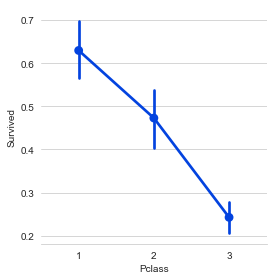

In [18]:
#Pclass
sns.set_style("whitegrid")
pl=sns.PairGrid(data=dataset, x_vars=['Pclass'], y_vars=['Survived'],size=4)
pl.map(sns.pointplot,color=sns.xkcd_rgb["blue"])
sns.despine(left=True)

C:\Users\yqm\Miniconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


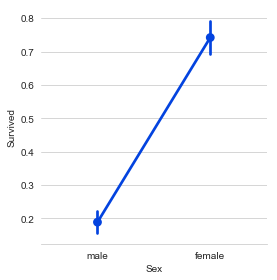

In [19]:
#Sex
sns.set_style("whitegrid")
pl=sns.PairGrid(data=dataset, x_vars=['Sex'], y_vars=['Survived'],size=4)
pl.map(sns.pointplot,color=sns.xkcd_rgb["blue"])
sns.despine(left=True)

In [20]:
dataset['Female']=dataset['Sex'].apply(lambda x: 1 if x=='female' else 0)
dataset = dataset.drop(['Sex'],axis=1)

In [21]:
# Age
dataset['Child']=dataset['Age'].apply(lambda x: 1 if x<=12 else 0)

C:\Users\yqm\Miniconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


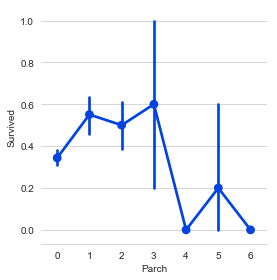

In [22]:
# SibSp and Parch
sns.set_style("whitegrid")
pl=sns.PairGrid(data=dataset, x_vars=['Parch'], y_vars=['Survived'],size=4)
pl.map(sns.pointplot,color=sns.xkcd_rgb["blue"])
sns.despine(left=True)

C:\Users\yqm\Miniconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


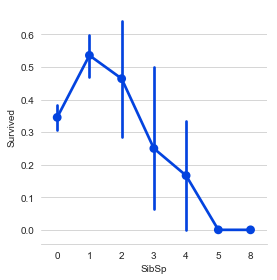

In [23]:
sns.set_style("whitegrid")
pl=sns.PairGrid(data=dataset, x_vars=['SibSp'], y_vars=['Survived'],size=4)
pl.map(sns.pointplot,color=sns.xkcd_rgb["blue"])
sns.despine(left=True)

In [24]:
dataset['family']=dataset['Parch']+dataset['SibSp']+1
dataset=dataset.drop(['Parch','SibSp'],axis=1)

In [25]:
# Fair
dataset['Fare']=dataset.Fare.map(lambda x: np.log(x) if x>0 else 0)

In [26]:
# Embarked
dataset = pd.get_dummies(dataset, prefix='Embarked')

In [27]:
dataset.head()

,Survived,Pclass,Age,Fare,Female,Child,family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1.981001,0,0,2,0,0,1
1,1,1,38.0,4.266662,1,0,2,1,0,0
2,1,3,26.0,2.070022,1,0,1,0,0,1
3,1,1,35.0,3.972177,1,0,2,0,0,1
4,0,3,35.0,2.085672,0,0,1,0,0,1


In [28]:
# standardize the Age and Embarked columns
s=StandardScaler()
dataset[['Fare']]=s.fit_transform(dataset[['Fare']])
dataset[['Age']]=s.fit_transform(dataset[['Age']])

In [29]:
dataset.head()

,Survived,Pclass,Age,Fare,Female,Child,family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.592481,-0.910717,0,0,2,0,0,1
1,1,1,0.638789,1.369616,1,0,2,1,0,0
2,1,3,-0.284663,-0.821904,1,0,1,0,0,1
3,1,1,0.407926,1.075818,1,0,2,0,0,1
4,0,3,0.407926,-0.806291,0,0,1,0,0,1


In [30]:
x,y =dataset.drop(['Survived'],axis=1), dataset['Survived']

In [31]:
SEED=0
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

# Build Models

Logistic Regression

In [32]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_train=lg.predict(X_train)
lg_pred_train_accuracy=metrics.accuracy_score(y_train,lg_pred_train)
print('Training Set Accuracy is: {:.4f}'.format(lg_pred_train_accuracy))

Training Set Accuracy is: 0.8084


C:\Users\yqm\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_test=lg.predict(X_test)
lg_pred_test_accuracy=metrics.accuracy_score(y_test,lg_pred_test)
print('Test Set Accuracy is: {:.4f}'.format(lg_pred_test_accuracy))

Test Set Accuracy is: 0.7982


C:\Users\yqm\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
# Fit dt to the training set
lg.fit(X_train,y_train)
lg_pred_train=lg.predict(X_train)
# Evaluate the training set RMSE of dt
lg_RMSE_train = (MSE(y_train, lg_pred_train))**(1/2)
# Print RMSE_train
print('Train set RMSE: {:.2f}'.format(lg_RMSE_train))

Train set RMSE: 0.44


C:\Users\yqm\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:

# Compute the array containing the 10-folds CV MSEs
lg_MSE_CV_scores_train = - cross_val_score(lg, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
lg_RMSE_CV_train = (lg_MSE_CV_scores_train.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(lg_RMSE_CV_train))

CV RMSE: 0.44


SVC

In [36]:

# SVC 
svc = svm.SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)
svc_y_pred_test = svc.predict(X_test)
svc_y_pred_train = svc.predict(X_train)
print(classification_report(y_test, svc_y_pred_test))
svc_pred_test_accuracy=metrics.accuracy_score(y_test,svc_y_pred_test)
print('Test Set Accuracy is: {:.4f}'.format(svc_pred_test_accuracy))
svc_pred_test_f1=metrics.f1_score(y_test,svc_y_pred_test)
print('Test F1 Score is: {:.4f}'.format(svc_pred_test_f1))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       139
           1       0.71      0.70      0.71        84

   micro avg       0.78      0.78      0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223

Test Set Accuracy is: 0.7803
Test F1 Score is: 0.7066


In [37]:
# SVC rbf
svc_rbf = svm.SVC(kernel='rbf', C=1)
svc_rbf.fit(X_train, y_train)
svc_rbf_y_pred_test = svc_rbf.predict(X_test)
svc_rbf_y_pred_train = svc_rbf.predict(X_train)
print(classification_report(y_test, svc_rbf_y_pred_test))
svc_rbf_pred_test_accuracy=metrics.accuracy_score(y_test,svc_rbf_y_pred_test)
print('Test Set Accuracy is: {:.4f}'.format(svc_rbf_pred_test_accuracy))
svc_rbf_pred_test_f1=metrics.f1_score(y_test,svc_rbf_y_pred_test)
print('Test F1 Score is: {:.4f}'.format(svc_rbf_pred_test_f1))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       139
           1       0.77      0.74      0.75        84

   micro avg       0.82      0.82      0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223

Test Set Accuracy is: 0.8161
Test F1 Score is: 0.7515


C:\Users\yqm\Miniconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
# Linear SVC
svc_linear = LinearSVC( C=1)
svc_linear.fit(X_train, y_train)
svc_linear_y_pred_test = svc_linear.predict(X_test)
svc_linear_y_pred_train = svc_linear.predict(X_train)
print(classification_report(y_test, svc_linear_y_pred_test))
svc_linear_pred_test_accuracy=metrics.accuracy_score(y_test,svc_linear_y_pred_test)
print('Test Set Accuracy is: {:.4f}'.format(svc_linear_pred_test_accuracy))
svc_linear_pred_test_f1=metrics.f1_score(y_test,svc_linear_y_pred_test)
print('Test F1 Score is: {:.4f}'.format(svc_linear_pred_test_f1))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       139
           1       0.73      0.71      0.72        84

   micro avg       0.79      0.79      0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

Test Set Accuracy is: 0.7937
Test F1 Score is: 0.7229


C:\Users\yqm\Miniconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Ramdom Forest

In [39]:

rf = RandomForestClassifier(max_depth=5, min_samples_leaf=0.01,n_estimators = 200,random_state=1)
rf.fit(X_train, y_train)
rf_y_pred_test = rf.predict(X_test)
rf_y_pred_train = rf.predict(X_train)
print(classification_report(y_test, rf_y_pred_test))
rf_pred_test_accuracy=metrics.accuracy_score(y_test,rf_y_pred_test)
print('Test Set Accuracy is: {:.4f}'.format(rf_pred_test_accuracy))
rf_pred_test_f1=metrics.f1_score(y_test,rf_y_pred_test)
print('Test F1 Score is: {:.4f}'.format(rf_pred_test_f1))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       139
           1       0.85      0.65      0.74        84

   micro avg       0.83      0.83      0.83       223
   macro avg       0.83      0.79      0.80       223
weighted avg       0.83      0.83      0.82       223

Test Set Accuracy is: 0.8251
Test F1 Score is: 0.7383


In [40]:
rf_MSE_CV_scores_train = - cross_val_score(rf, X_train, y_train, cv=10, 
                                 scoring='neg_mean_squared_error', 
                                 n_jobs=-1) 
rf_RMSE_CV_train = (rf_MSE_CV_scores_train.mean())**(1/2)
rf_RMSE_train = MSE(y_train, rf_y_pred_train)**(1/2)
rf_RMSE_test = MSE(y_test, rf_y_pred_test)**(1/2)
print('CV RMSE: {:.2f}'.format(rf_RMSE_CV_train))
print('TrainSet RMSE: {:.2f}'.format(rf_RMSE_train))
print('TestSet RMSE: {:.2f}'.format(rf_RMSE_test))

CV RMSE: 0.43
TrainSet RMSE: 0.39
TestSet RMSE: 0.42


Enhance 

Gradient Boosting 

In [41]:

# Instantiate gb
gb = GradientBoostingClassifier(max_depth=5,
                               n_estimators=100,
                               random_state=1)
# Fit gb to the training set
gb.fit(X_train, y_train)
# Predict test set labels
gb_y_pred_test = gb.predict(X_test)
gb_y_pred_train = gb.predict(X_train)
print(classification_report(y_test, gb_y_pred_test))
gb_pred_test_accuracy=metrics.accuracy_score(y_test,gb_y_pred_test)
print('Test Set Accuracy is: {:.4f}'.format(gb_pred_test_accuracy))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       139
           1       0.82      0.79      0.80        84

   micro avg       0.86      0.86      0.86       223
   macro avg       0.85      0.84      0.85       223
weighted avg       0.86      0.86      0.86       223

Test Set Accuracy is: 0.8565


In [42]:
gb_MSE_CV_scores_train = - cross_val_score(gb, X_train, y_train, cv=5, 
                               scoring='neg_mean_squared_error', 
                                n_jobs=-1) 
gb_RMSE_CV_train = (gb_MSE_CV_scores_train.mean())**(1/2)
gb_RMSE_train = MSE(y_train, gb_y_pred_train)**(1/2)
gb_RMSE_test = MSE(y_test, gb_y_pred_test)**(1/2)
print('CV RMSE: {:.4f}'.format(gb_RMSE_CV_train))
print('TrainSet RMSE: {:.4f}'.format(gb_RMSE_train))
print('TestSet RMSE: {:.4f}'.format(gb_RMSE_test))

CV RMSE: 0.4343
TrainSet RMSE: 0.1973
TestSet RMSE: 0.3788


Bagging Classifier

In [43]:

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=rf, n_estimators=200,n_jobs=-1)
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict test set labels
bc_y_pred_test = bc.predict(X_test)
bc_y_pred_train = bc.predict(X_train)

In [44]:
bc_accuracy_test = metrics.accuracy_score(y_test, bc_y_pred_test)
print('Accuracy of Bagging Classifier: {:.4f}'.format(bc_accuracy_test))

Accuracy of Bagging Classifier: 0.8161


In [45]:
bc_MSE_CV_scores_train = - cross_val_score(bc, X_train, y_train, cv=5, 
                               scoring='neg_mean_squared_error', 
                                n_jobs=-1) 
bc_RMSE_CV_train = (bc_MSE_CV_scores_train.mean())**(1/2)
bc_RMSE_train = MSE(y_train, bc_y_pred_train)**(1/2)
bc_RMSE_test = MSE(y_test, bc_y_pred_test)**(1/2)
print('CV RMSE: {:.4f}'.format(bc_RMSE_CV_train))
print('TrainSet RMSE: {:.4f}'.format(bc_RMSE_train))
print('TestSet RMSE: {:.4f}'.format(bc_RMSE_test))

CV RMSE: 0.4185
TrainSet RMSE: 0.3965
TestSet RMSE: 0.4288


Compare Models

In [46]:
classifiers = [('Logistic Regression', lg), ('Support Vectors', svc),('Random Forest',rf),('Gradient Bossting', gb),('Bagging Classifier', bc)] 

In [44]:
for clf_name, clf in classifiers:    
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
    # Predict y_pred
    y_pred = clf.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

C:\Users\yqm\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression : 0.798
Support Vectors : 0.780
Random Forest : 0.825
Gradient Bossting : 0.857
Bagging Classifier : 0.816


Voting Classfier

In [47]:
# Import VotingCLassifier from sklearn.ensemble

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers, voting= 'hard', weights=[1,1,1,5,1])     
# Fit vc to the training set
vc.fit(X_train, y_train)   
# Evaluate the test set predictions
vc_y_pred_test = vc.predict(X_test)
# Calculate accuracy score
vc_accuracy_test = metrics.accuracy_score(y_test, vc_y_pred_test)
print('Hard Voting Classifier: {:.3f}'.format(vc_accuracy_test))

C:\Users\yqm\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Hard Voting Classifier: 0.857


In [47]:
vc_f1_test = metrics.f1_score(y_test, vc_y_pred_test)
print('Hard Voting Classifier F1-score: {:.3f}'.format(vc_f1_test))

Hard Voting Classifier F1-score: 0.805


# Prediction

In [48]:
#clean data 
hold_test=pd.read_csv("holdout_test.csv")
hold_test = hold_test.drop(['PassengerId'], axis = 1)
hold_test = hold_test.drop(['Ticket'], axis = 1)
hold_test = hold_test.drop(['Cabin'], axis = 1)
hold_test = hold_test.drop(['Name'], axis = 1)
hold_test["Age"].fillna(hold_test["Age"].mean(), inplace=True)
hold_test['Embarked']=hold_test['Embarked'].fillna('S')
hold_test['Female']=hold_test['Sex'].apply(lambda x: 1 if x=='female' else 0)
hold_test = hold_test.drop(['Sex'],axis=1)
hold_test['Child']=hold_test['Age'].apply(lambda x: 1 if x<=12 else 0)
hold_test['family']=hold_test['Parch']+hold_test['SibSp']+1
hold_test=hold_test.drop(['Parch','SibSp'],axis=1)
hold_test['Fare']=hold_test.Fare.map(lambda x: np.log(x) if x>0 else 0)
hold_test = pd.get_dummies(hold_test, prefix='Embarked')
s=StandardScaler()
hold_test[['Fare']]=s.fit_transform(hold_test[['Fare']])
hold_test[['Age']]=s.fit_transform(hold_test[['Age']])


In [49]:
hold_test = hold_test.drop(['Survived'], axis = 1)

In [50]:
vc_hould_pred = vc.predict(hold_test)

In [51]:
hold_test=pd.read_csv("holdout_test.csv")
result=pd.DataFrame({
    'PassengerId': hold_test['PassengerId'],
    'Survived':vc_hould_pred
})

In [52]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [53]:
result.to_csv('Titanic Results from WeihuangXie.csv',index=False)

Summary: Among all the models, Voting Classfier has the best performance, achieving accruacy as 0.86 and F-1 scores as 0.81.It includes all the individual models which make it more comprehensive and accruate but it takes extra runtime to exectue the code. 